# 1. Import the basics, the data, and have a look

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('kc_house_data.csv')

In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Get rid of some of the unused variables

In [50]:
df = df[["date", "price", "sqft_living", "zipcode", "sqft_lot", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15", "lat"]]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
date             21597 non-null object
price            21597 non-null float64
sqft_living      21597 non-null int64
zipcode          21597 non-null int64
sqft_lot         21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
lat              21597 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 1.6+ MB


# 3. For the independent variable we're working with (renovated), what kind of null/empty values are we looking at

In [52]:
len(df[df["yr_renovated"].isna() | df["yr_renovated"] == 0]["yr_renovated"])

17011

# 4. Have a look at the data distribution

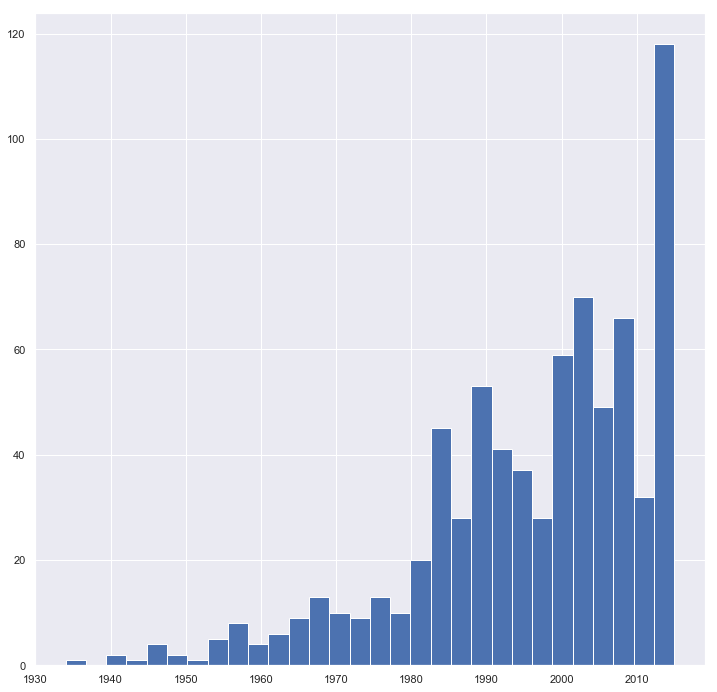

In [53]:
(n, bins, patches) = plt.hist(df[df["yr_renovated"] > 0]["yr_renovated"], bins=30)

# Something happening in recent years, large renovation boom. Since when?

In [54]:
bins[-2:]

array([2012.3, 2015. ])

In [530]:
bins[-7:-6]

array([1998.8])

# Creating new variable based on newness

In [55]:
df["blt_or_renov"] = df["yr_renovated"]

In [56]:
df.loc[df[df["blt_or_renov"] == 0].index, "blt_or_renov"] = df[df["blt_or_renov"] ==0]["yr_built"]

In [57]:
df["blt_or_renov"].fillna(value=df["yr_built"], inplace=True)

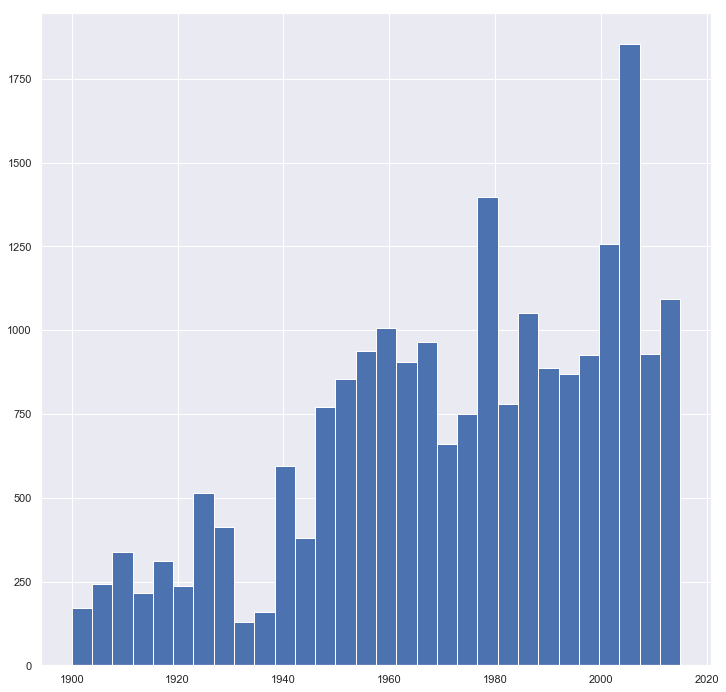

In [58]:
df["blt_or_renov"].hist(bins=30)

In [59]:
df.head()

,date,price,sqft_living,zipcode,sqft_lot,yr_built,yr_renovated,sqft_living15,sqft_lot15,lat,blt_or_renov
0,10/13/2014,221900.0,1180,98178,5650,1955,0.0,1340,5650,47.5112,1955.0
1,12/9/2014,538000.0,2570,98125,7242,1951,1991.0,1690,7639,47.7210,1991.0
2,2/25/2015,180000.0,770,98028,10000,1933,NaN,2720,8062,47.7379,1933.0
3,12/9/2014,604000.0,1960,98136,5000,1965,0.0,1360,5000,47.5208,1965.0
4,2/18/2015,510000.0,1680,98074,8080,1987,0.0,1800,7503,47.6168,1987.0


# Create a price per square foot variable and model it

In [60]:
df["price_per_sqft"] = df["price"]/df["sqft_living"]
df_filter = df[df["price_per_sqft"] > 0]

In [61]:
from statsmodels.formula.api import ols
model = ols(formula="blt_or_renov~price_per_sqft", data=df_filter).fit()

In [62]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blt_or_renov   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1505.
Date:                Tue, 07 May 2019   Prob (F-statistic):          2.12e-318
Time:                        11:11:26   Log-Likelihood:            -1.0260e+05
No. Observations:               21597   AIC:                         2.052e+05
Df Residuals:                   21595   BIC:                         2.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1990.6887      0.495   4018.473      0.000    1989.718    1991.660
price_per_sqft    -0.0672      0.002    -38.799      0.000      -0.071      -0.064
==============================================================================
Omnibus:                      878.681   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.553
Skew:                          -0.352   Prob(JB):                    5.01e-150
Kurtosis:                       2.481   Cond. No.                         744.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model.conf_int()

,0,1
Intercept,1989.717742,1991.659722
price_per_sqft,-0.070568,-0.063781


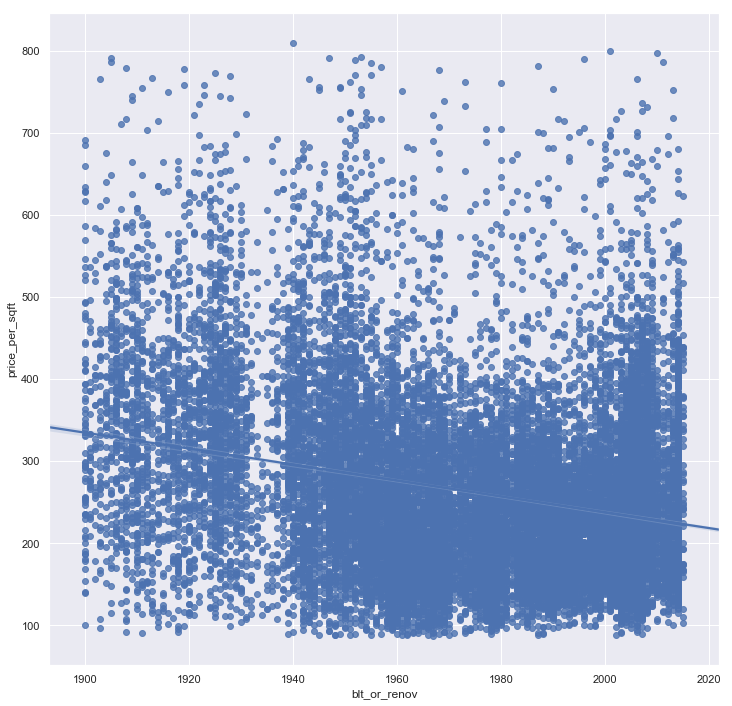

In [64]:
sns.regplot("blt_or_renov","price_per_sqft", data=df)

# Low R^2 and generally doesn't look like any correlation

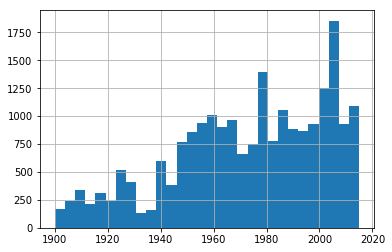

In [18]:
df["blt_or_renov"].hist(bins=30)

# But is something different happening within each zip code?
Does renovation or new construction affect price in certain areas vs others?
Here's a stepwise linear regression on the same chart

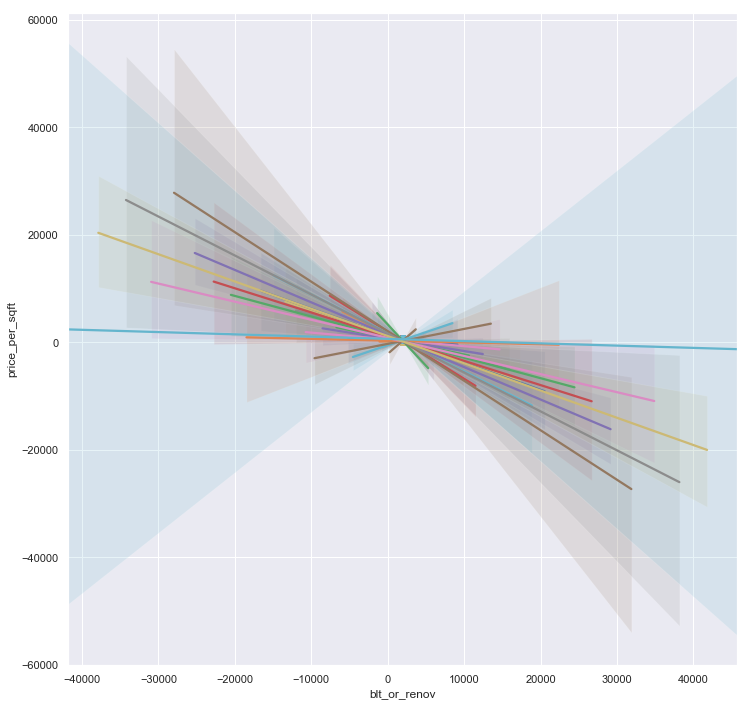

In [19]:
rsquared = {}
slopes = {}

sns.set(rc={'figure.figsize':(12,12)})
for zipcode in df["zipcode"].unique():
    df_filter = df[df["zipcode"] == zipcode]
    model = ols(formula="blt_or_renov~price_per_sqft", data=df_filter).fit()
    sns.regplot("blt_or_renov","price_per_sqft", data=df_filter, label=zipcode)
    rsquared[zipcode] = model.rsquared
    slopes[zipcode] = model.params[1]


Strangely, there's a negative slope for a majority of zipcodes. Let's see what the largest correlations are.

In [71]:
print("Top 5 Largest Rs")
top_slopes = sorted(rsquared.items(),key=lambda x:x[1])[-5:]
print(top_slopes)

Top 5 Largest Rs
[(98103, 0.0794811854017542), (98126, 0.09163672084252017), (98108, 0.10002277396612536), (98042, 0.10774784822219807), (98019, 0.11908482423845401)]


And what are the slopes of those with some kind of correlation?

In [73]:
[slopes[x[0]] for x in top_slopes]

[-0.11991816126585648,
 -0.12137787027224395,
 -0.14289468465125216,
 -0.1320857296563127,
 -0.14091739566978326]

All negative. While the correlation is weak, maybe there's something to be said that newly renovated or built housing is cheaper price per square foot than older housing.

Out of curiosity, where is it trending upwards? Where new/refurbished housing is more expensive.


In [75]:
pos_slopes = [x[0] for x in slopes.items() if x[1] > 0]

In [76]:
print(pos_slopes)

[98053, 98007, 98112, 98027, 98166, 98070, 98008, 98144, 98034, 98102, 98029]


Redmond, WA (home of Microsoft), Bellevue, Washington Park, etc.. 

And greatest decrease in new building prices?

In [80]:
sorted(slopes.items(),key=lambda x:x[1])[0:5]


[(98108, -0.14289468465125216),
 (98019, -0.14091739566978326),
 (98055, -0.13323386095987383),
 (98042, -0.1320857296563127),
 (98106, -0.12894118515667718)]

Near Boeing Field airport, Duvall, Renton, Kent, Delridge
Except for Delridge, they are all outside downtown Seattle, with Duvall being rural.

Ok, now back to the model. It may not be highly correlated, but maybe there's something else we can say about it.

Let's take one of the zip codes with the highest correlation.

In [414]:
df[df["zipcode"] == 98019].head()

,date,price,sqft_living,zipcode,sqft_lot,yr_built,yr_renovated,sqft_living15,sqft_lot15,blt_or_renov,price_per_sqft
16,7/31/2014,395000.0,1890,98019,14040,1994,0.0,1890,14018,1994.0,208.994709
45,7/18/2014,488000.0,3160,98019,13603,2003,NaN,3050,9232,2003.0,154.430380
382,3/13/2015,389000.0,2130,98019,5337,2001,NaN,2300,6930,2001.0,182.629108
392,6/18/2014,330000.0,1600,98019,26977,2005,0.0,1790,27743,2005.0,206.250000
418,12/23/2014,355000.0,1860,98019,5028,2012,0.0,2320,5465,2012.0,190.860215


Taking a look at the relationship for the zipcode with the largest correlation - 98019.

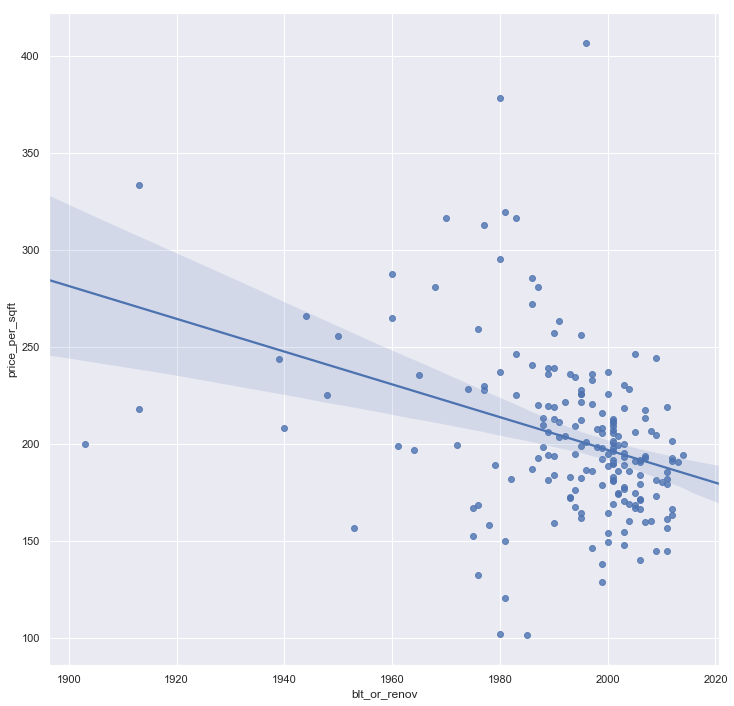

In [24]:
sns.regplot("blt_or_renov","price_per_sqft", data=df[df["zipcode"] == 98019], label=zipcode)

Appears to be a significant difference between houses renovated/built before 1980 and after. Maybe we can just restrict it to the post 1980 era, where most of the data is from.

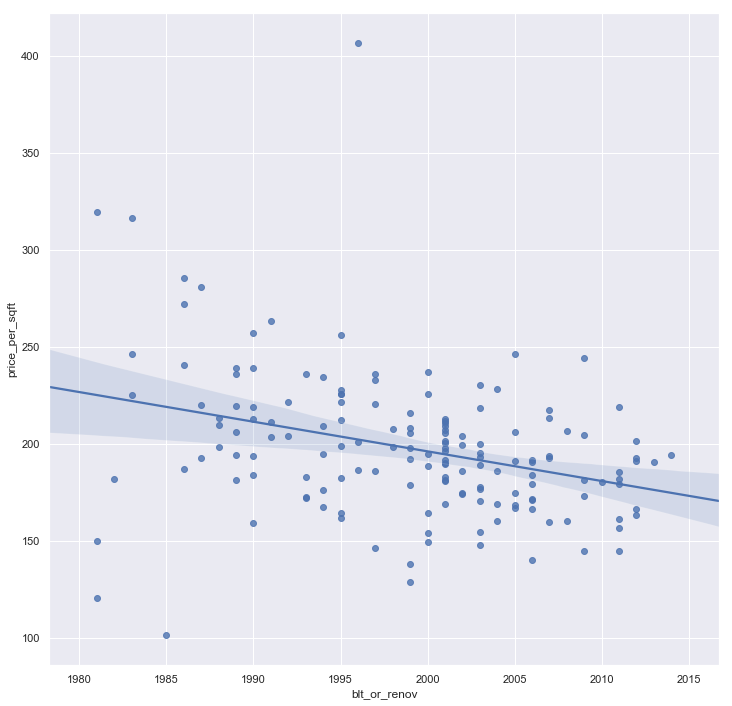

In [25]:
sns.regplot("blt_or_renov","price_per_sqft", data=df[(df["zipcode"] == 98019) & (df["blt_or_renov"] >1980)], label=zipcode)

What about all zipcodes, post-1980?

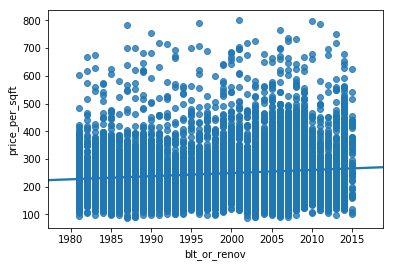

In [417]:
sns.regplot("blt_or_renov","price_per_sqft", data=df[(df["blt_or_renov"] >1980)], label=zipcode)

Eh, not so much. Back to specific zip codes. Using the largest correlation again (98019)

In [65]:
df_98019 = df[(df["zipcode"] == 98019) & (df["blt_or_renov"] >1980)]


In [83]:
from statsmodels.formula.api import ols
model = ols(formula="blt_or_renov~price_per_sqft", data=df_98019).fit()


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           blt_or_renov   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     18.84
Date:                Tue, 07 May 2019   Prob (F-statistic):           2.55e-05
Time:                        10:37:43   Log-Likelihood:                -542.94
No. Observations:                 158   AIC:                             1090.
Df Residuals:                     156   BIC:                             1096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2012.8423      3.269    615.824      0.000    2006.386    2019.299
price_per_sqft    -0.0705      0.016     -4.340      0.000      -0.103      -0.038
==============================================================================
Omnibus:                        4.627   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.410
Skew:                          -0.408   Prob(JB):                        0.110
Kurtosis:                       3.052   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, not a great R2, but decent confidence interval. A lot of the data falls within the range. Can maybe do a higher confidence interval. Let's say 99%?

In [37]:
model.conf_int(.01)

,0,1
Intercept,2004.31895,2021.365742
price_per_sqft,-0.11287,-0.028145


Let's look at the QQ plot. 

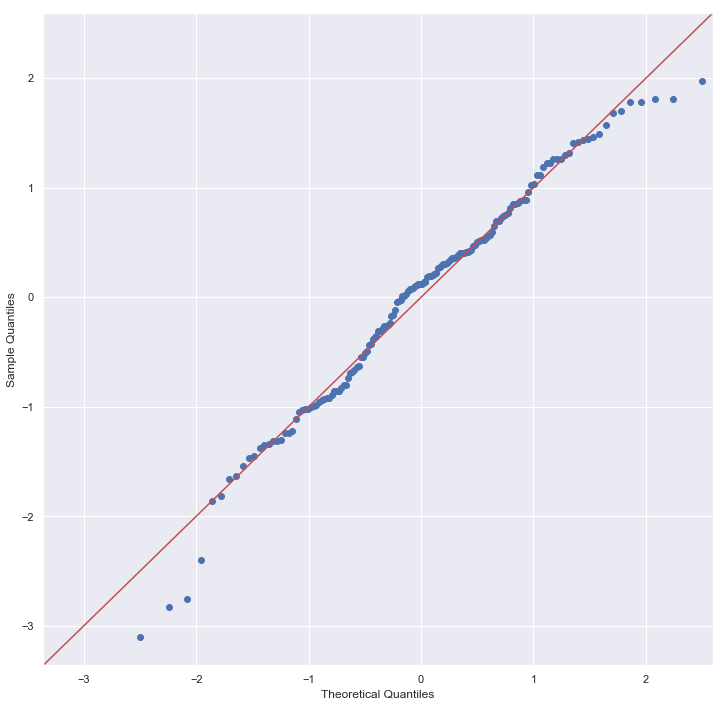

In [29]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


Pretty good fit for most of the quartiles, maybe a good way of saying "the data is trending with the linear regression" even if the predictive power is weak.

Additionally, we'll graph the exog data, just to see that it fits within a distribution along the linear regression

In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

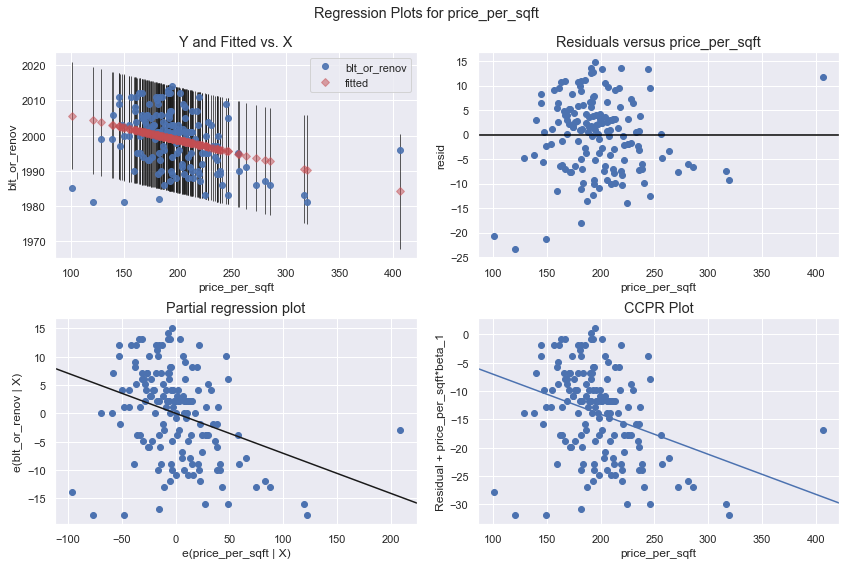

In [84]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "price_per_sqft", fig=fig)